In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import skimage.color
import skimage.io
import skimage.transform

import skimage
# Root directory of the project
ROOT_DIR = os.path.abspath("../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import buildings

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
BALLON_WEIGHTS_PATH = os.path.join(ROOT_DIR, "weights/mask_rcnn_balloon.h5")
#"/path/to/mask_rcnn_balloon.h5"  # TODO: update this path

In [2]:
def display_images(images, titles=None, cols=4, cmap=None, norm=None,
                   interpolation=None):
    """Display the given set of images, optionally with titles.
    images: list or array of image tensors in HWC format.
    titles: optional. A list of titles to display with each image.
    cols: number of images per row
    cmap: Optional. Color map to use. For example, "Blues".
    norm: Optional. A Normalize instance to map values to colors.
    interpolation: Optional. Image interpolation to use for display.
    """
    titles = titles if titles is not None else [""] * len(images)
    rows = len(images) // cols + 1
    plt.figure(figsize=(14, 14 * rows // cols))
    i = 1
    for image, title in zip(images, titles):
        plt.subplot(rows, cols, i)
        plt.title(title, fontsize=9)
        plt.axis('off')
        plt.imshow(image.astype(np.uint8), cmap=cmap,
                   norm=norm, interpolation=interpolation)
        i += 1
    plt.show()

In [3]:
def load_image(image_id):
    
    image = skimage.io.imread(image_id)
    # If grayscale. Convert to RGB for consistency.
    if image.ndim != 3:
        image = skimage.color.gray2rgb(image)
    # If has an alpha channel, remove it for consistency
    if image.shape[-1] == 4:
        image = image[..., :3]
    return image

In [8]:
fpath = os.path.join(ROOT_DIR, "datasets_SH_PAN", "images", "PAN_AOI_4_Shanghai_img1025.tif")

rgbpath = os.path.join(ROOT_DIR, "datasets_SH", "images", "RGB-PanSharpen_AOI_4_Shanghai_img1025.tif")

In [9]:
import rasterio
from rasterio.plot import show
from matplotlib import pyplot as plt

image = rasterio.open(fpath)
array_img = image.read()


rgbimage = rasterio.open(rgbpath)
rgb_img = rgbimage.read()

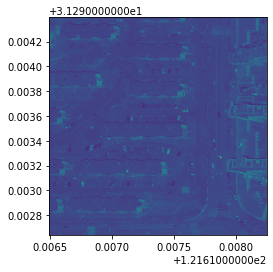

<AxesSubplot:>

In [10]:
show(image)

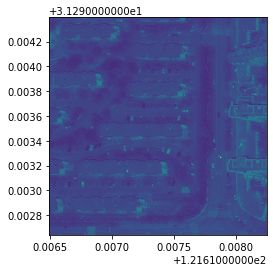

<AxesSubplot:>

In [11]:
show(rgbimage)

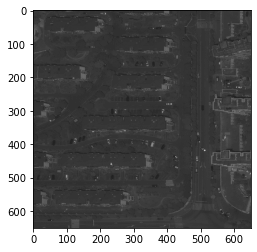

In [7]:
plt.imshow(array_img.transpose(1, 2, 0), cmap='gray')

In [20]:
image = skimage.io.imread(fpath)

In [22]:
image = skimage.color.gray2rgb(image)

In [25]:
image.ndim

3

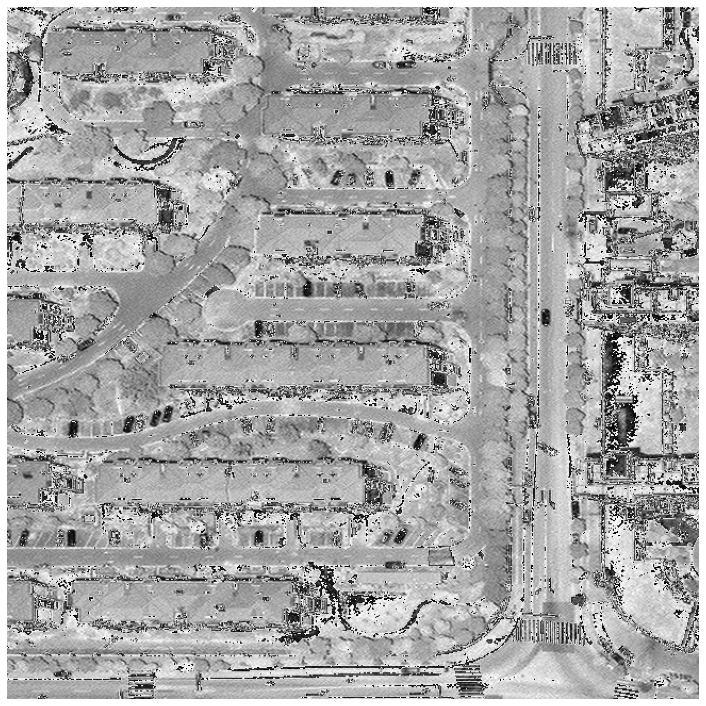

In [23]:
display_images([image], titles=None, cols=1, cmap='gray', norm=None, interpolation=None)

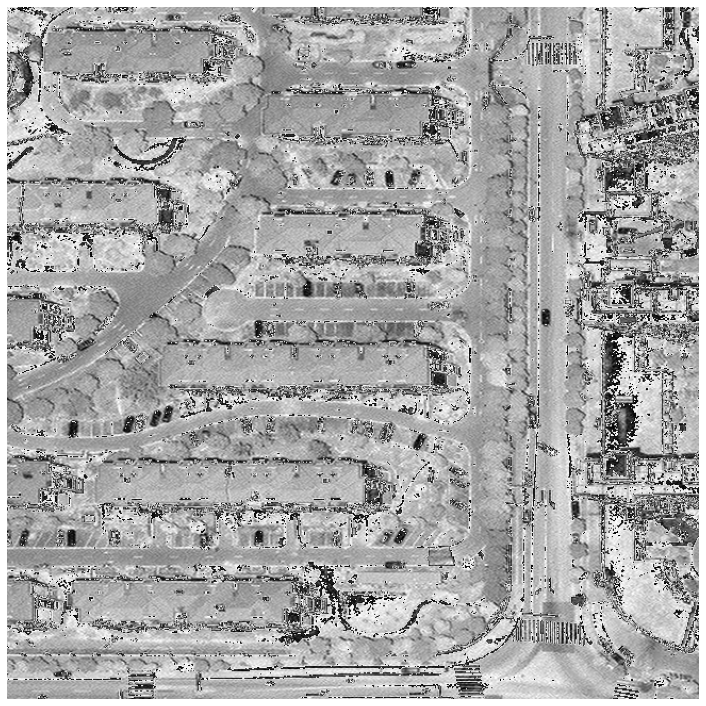

In [24]:
display_images([array_img.transpose(1, 2, 0)], titles=None, cols=1, cmap='gray', norm=None, interpolation=None)